# Let's get started!

#We've been able to get some  Employees data from Company   as a csv set, 
#let's get our environment ready with the libraries we'll need and then import the data!

#Import Libraries

In [44]:
# import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import datasets,linear_model, tree
from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.formula.api as smf
import re
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest


In [45]:
os.getcwd()

'C:\\Users\\toshi\\Downloads\\intership'

In [46]:
os.chdir("C:\\Users\\toshi\\Downloads\\intership")

In [47]:
ds = pd.read_csv("MFGEmployees4.csv")

In [48]:
#Top 5 rows of the datafram
ds.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [49]:
ds[['Gender','City','JobTitle','StoreLocation','Division','BusinessUnit']].describe()


,Gender,City,JobTitle,StoreLocation,Division,BusinessUnit
count,8336,8336,8336,8336,8336,8336
unique,2,243,47,40,6,2
top,M,Vancouver,Cashier,Vancouver,Stores,Stores
freq,4216,1780,1703,1836,8163,8163


# Data Analysis - Visually

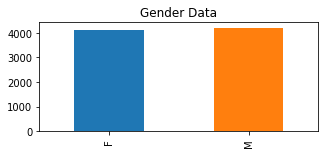

In [50]:
#  Gender BarPlot
(ds['Gender'].value_counts(sort=False)).plot.bar(y='No. of Entries',title='Gender Data',figsize=(5,2))
plt.show()

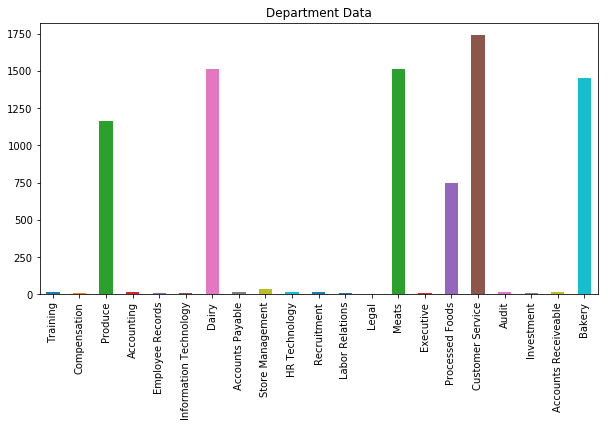

In [51]:
#  Department BarPlot
(ds['DepartmentName'].value_counts(sort=False)).plot.bar(y='No. of Entries',title='Department Data',figsize=(10,5))
plt.show()

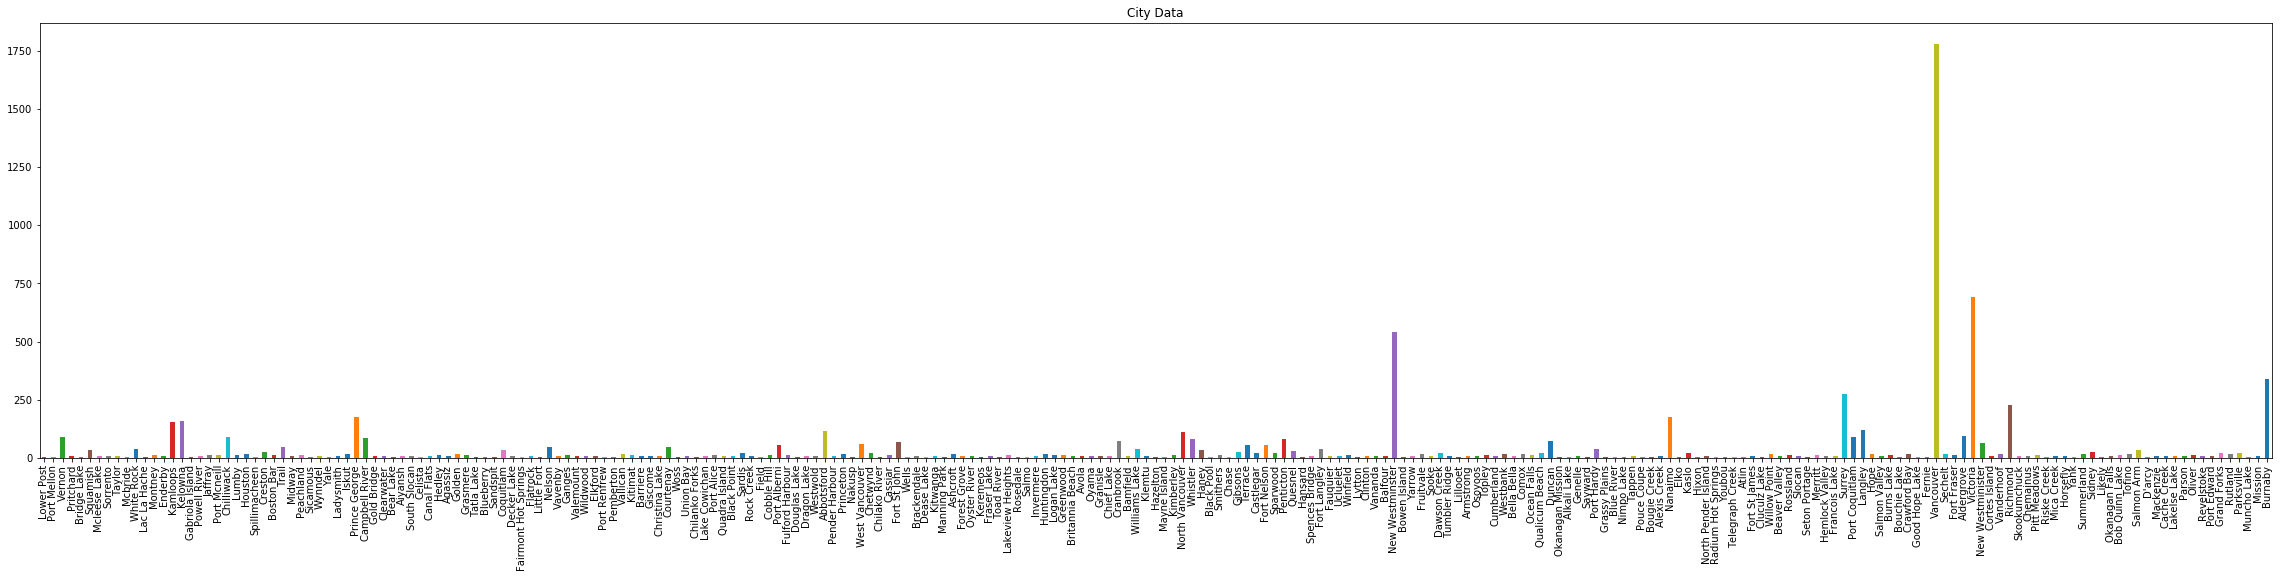

In [52]:
#  City BarPlot
(ds['City'].value_counts(sort=False)).plot.bar(y='No. of Entries',title='City Data',figsize=(40,8))
plt.show()

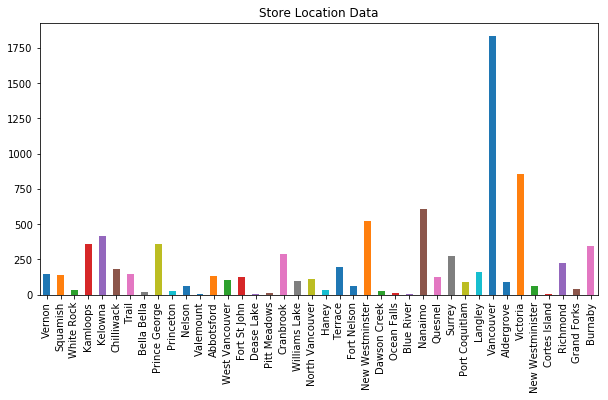

In [53]:
#  Store Location BarPlot
(ds['StoreLocation'].value_counts(sort=False)).plot.bar(y='No. of Entries',title='Store Location Data',figsize=(10,5))
plt.show()

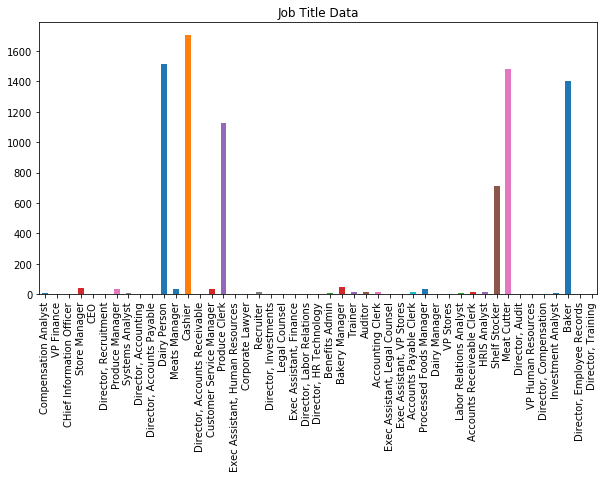

In [11]:
#  JobTitle BarPlot

(ds['JobTitle'].value_counts(sort=False)).plot.bar(y='No. of Entries',title='Job Title Data',figsize=(10,5))
plt.show()

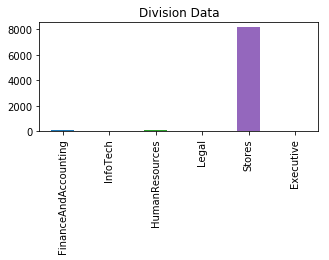

In [12]:
#  Division BarPlot
(ds['Division'].value_counts(sort=False)).plot.bar(y='No. of Entries',title='Division Data',figsize=(5,2))
plt.show()

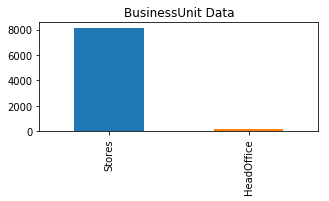

In [54]:
#  Business Unit BarPlot
(ds['BusinessUnit'].value_counts(sort=False)).plot.bar(y='No. of Entries',title='BusinessUnit Data',figsize=(5,2))
plt.show()

In [55]:
count = ds['City'].value_counts()
count

Vancouver           1780
Victoria             690
New Westminster      540
Burnaby              339
Surrey               275
Richmond             228
Nanaimo              176
Prince George        174
Kelowna              158
Kamloops             156
Langley              122
Abbotsford           114
North Vancouver      111
Aldergrove            94
Chilliwack            90
Vernon                90
Port Coquitlam        89
Campbell River        87
Penticton             82
Whistler              82
Duncan                72
Cranbrook             72
Fort St John          69
New Westminister      62
West Vancouver        60
Fort Nelson           55
Terrace               55
Port Alberni          54
Courtenay             49
Nelson                45
                    ... 
Rosedale               5
Toad River             5
Grassy Plains          5
Atlin                  5
Cluculz Lake           5
Nakusp                 5
Bouchie Lake           5
Muncho Lake            5
Port Renfrew           5


### Data Analysis - Visually for numerical data

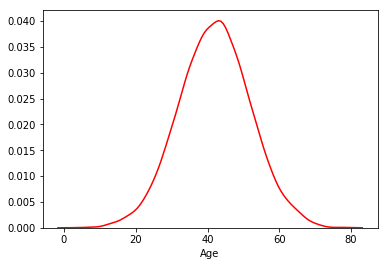

In [56]:
sns.distplot(ds['Age'],hist=False,color='red')

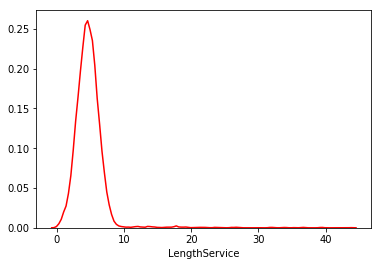

In [57]:
sns.distplot(ds['LengthService'],hist=False,color='red')

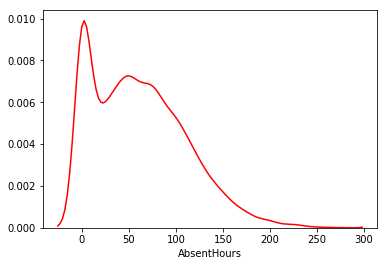

In [58]:
sns.distplot(ds['AbsentHours'],hist=False,color='red')

In [59]:
## Eliminate Outliers
dbkp = ds
ds = ds[(ds['Age']>= 18) & (ds['Age'] <= 65)]  
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8165 entries, 0 to 8335
Data columns (total 13 columns):
EmployeeNumber    8165 non-null int64
Surname           8165 non-null object
GivenName         8165 non-null object
Gender            8165 non-null object
City              8165 non-null object
JobTitle          8165 non-null object
DepartmentName    8165 non-null object
StoreLocation     8165 non-null object
Division          8165 non-null object
Age               8165 non-null float64
LengthService     8165 non-null float64
AbsentHours       8165 non-null float64
BusinessUnit      8165 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 893.0+ KB


In [60]:
# Create a column AbsentRate from AbsentHours 
ds['AbsentRate'] = ((ds['AbsentHours'])/(2080)) * 100
ds['AbsentRate']

C:\Users\toshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0       1.758524
1       1.450244
2       4.029221
3       3.366354
4       0.000000
5       3.934138
6       2.908417
7       1.445813
8       8.732251
9       1.474250
10      1.347036
12      0.000000
13      1.650694
14      0.000000
15      1.041338
16      0.000000
17      2.649030
18      3.922863
19      4.551373
20      5.210585
21      0.000000
22      3.256769
23      7.630024
24      0.000000
25      2.308512
26      2.057117
27      1.659821
28      2.878998
29      4.840101
30      0.457814
          ...   
8305    3.345338
8306    0.000000
8307    4.282963
8308    3.708496
8309    0.000000
8310    2.361249
8311    5.637145
8312    4.244182
8313    1.022670
8314    2.505527
8315    5.246085
8316    1.664593
8317    0.000000
8318    2.315971
8319    6.157636
8320    3.525604
8321    5.511289
8322    0.137832
8324    0.000000
8325    0.000000
8326    5.332033
8327    0.000000
8328    1.940724
8329    2.366650
8330    7.273322
8331    4.503130
8332    0.000000
8333    8.4786

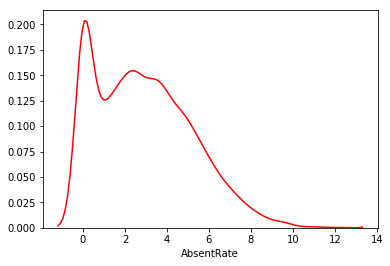

In [61]:
sns.distplot(ds['AbsentRate'],hist=False,color='red')


In [62]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8165 entries, 0 to 8335
Data columns (total 14 columns):
EmployeeNumber    8165 non-null int64
Surname           8165 non-null object
GivenName         8165 non-null object
Gender            8165 non-null object
City              8165 non-null object
JobTitle          8165 non-null object
DepartmentName    8165 non-null object
StoreLocation     8165 non-null object
Division          8165 non-null object
Age               8165 non-null float64
LengthService     8165 non-null float64
AbsentHours       8165 non-null float64
BusinessUnit      8165 non-null object
AbsentRate        8165 non-null float64
dtypes: float64(4), int64(1), object(9)
memory usage: 956.8+ KB


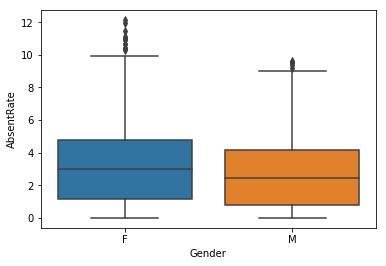

In [63]:
# Bi-Variate Analysis
sns.boxplot(x=ds['Gender'],y=ds['AbsentRate'],data=ds)


In [64]:
ds.corr()

,EmployeeNumber,Age,LengthService,AbsentHours,AbsentRate
EmployeeNumber,1.000000,-0.024625,-0.123113,0.001608,0.001608
Age,-0.024625,1.000000,0.056234,0.824613,0.824613
LengthService,-0.123113,0.056234,1.000000,-0.046692,-0.046692
AbsentHours,0.001608,0.824613,-0.046692,1.000000,1.000000
AbsentRate,0.001608,0.824613,-0.046692,1.000000,1.000000


In [65]:
#backups
dbkp2 = ds


In [66]:
#drop unimportant colomns
ds.drop(["EmployeeNumber","Surname","GivenName","City","AbsentHours"],axis=1,inplace=True)


C:\Users\toshi\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
# Re-arranging the categorical columns 
columns = list(ds.columns)
ds = ds[columns[8:9]+columns[5:7]+columns[:5]+columns[7:8]]
ds.columns

Index(['AbsentRate', 'Age', 'LengthService', 'Gender', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit'],
      dtype='object')

In [68]:
# Creating Dummy Variables
ds = pd.get_dummies(ds, columns=["Gender", "JobTitle","DepartmentName", "StoreLocation","Division","BusinessUnit"],drop_first=True)


In [69]:
# X=Independent Variables,y=depended variable
array = ds.values
y = array[:,0]
X = array[:,1:115]


In [70]:
# Model Ensembling

scoring = 'r2'
models = []

models.append(('Linear Regression : ',LinearRegression()))
models.append(('RandomForest   : ',RandomForestRegressor()))
models.append(('KNN     : ',KNeighborsRegressor()))
models.append(('DecisionTree-CART : ',DecisionTreeRegressor()))

results = []
names =  []
seed=7

for name, model in models:
    kfold = KFold(len(X),n_folds=10,random_state=seed)
    cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f " %(name,cv_results.mean())
    print(msg)


Linear Regression :  0.708845 
RandomForest   :  0.687006 
KNN     :  0.686324 
DecisionTree-CART :  0.486619 


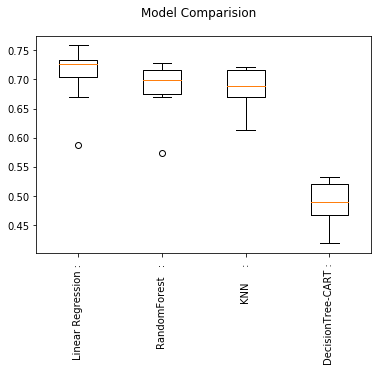

In [71]:
# Comparing ML Algorithms 
fig = plt.figure()
fig.suptitle('Model Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()


###Linear Regression is Bst model###

In [72]:
# Reducing Dimensionality using PCA
t_s = 0.2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=t_s)

In [73]:
# Standardize 
scaler = StandardScaler()
scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
# Apply transform 
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
pca = PCA(.95)


In [75]:
#pca
pca.fit(Xs_train)
Xs_train = pca.transform(Xs_train)
Xs_test = pca.transform(Xs_test)


In [76]:
# Fitting the Linear Regression
lm = LinearRegression()
lm_fit = lm.fit(Xs_train,y_train)



In [77]:
print("Intercept    : = ", lm_fit.intercept_)

Intercept    : =  2.931122919227494


In [78]:
print("Co-efficient : = ", lm_fit.coef_)


Co-efficient : =  [-1.94982189e-02 -3.82823677e-02  3.06109521e-03  1.73292837e-02
  3.07507452e-02  4.68556569e-02  1.93593786e-02 -4.23354837e-02
  3.56167562e-02  2.27667608e-03  7.87540365e-02 -2.36187668e-02
  3.45345514e-02 -6.88449260e-02 -1.20311039e-04 -8.25033898e-03
  1.98212138e-02 -2.18594708e-02  2.06611211e-02  2.93577306e-01
  6.07988988e-01  3.53205867e-02  8.27058124e-02 -1.30015151e-01
  5.85818554e-01  2.50648869e-01  6.66679395e-03  5.77214259e-01
 -1.94681953e-01 -1.98819168e-01  1.33954531e-02  7.24193946e-02
  2.32038002e-01 -2.97827013e-02 -1.21531539e-02  4.33231736e-02
  1.43767422e-02 -1.48292903e-01 -4.40078976e-02 -3.29275687e-02
 -9.41360540e-02 -5.19854037e-02 -6.87780915e-02 -3.12570737e-02
  7.40566831e-02  8.87551200e-02  4.59864774e-02 -2.33703996e-02
 -3.08963830e-02  2.19999577e-02  1.38679926e-02  1.00380064e-02
 -7.18243463e-03  6.06048722e-03  1.64739101e-02 -3.40679036e-02
  1.16829162e-03 -5.48351663e-03 -3.97693728e-02  9.71896805e-03
 -3.341

In [79]:
# Prediction
y_predict = lm.predict(Xs_test)
lm_predict = lm.fit(Xs_test,y_predict)


In [80]:
print("Intercept    : = ", lm_predict.intercept_)

Intercept    : =  2.9309647816884508


In [81]:
# Finding Accuracy
print("R2 Score           : ",r2_score(y_test,y_predict))
print("Mean Squared Error : ",mean_squared_error(y_test,y_predict))


R2 Score           :  0.30452254679175894
Mean Squared Error :  3.617065415413727
